In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
ticker = 'AXP'
START_DATE = '2020-03-30' #22nd fell on a sunday, price used was for friday the 20th
END_DATE = '2023-03-28'

In [3]:
x = yf.download(ticker, start=START_DATE, end=END_DATE)['Close']\
 .resample('D') \
 .last() \
 .pct_change() \
 .dropna()

[*********************100%***********************]  1 of 1 completed


In [4]:
x1 = x.reset_index() # move date and time to axis 1 index 0
date = x1['Date'].dt.date # remove time stamp
ex_dt = x1.iloc[:,1:] # create new date only index column
data = ex_dt.set_index(date) # set date column
data

,Close
Date,
2020-03-31,-0.051623
2020-04-01,-0.090760
2020-04-02,-0.015159
2020-04-03,-0.039917
2020-04-04,0.000000
...,...
2023-03-23,0.000061
2023-03-24,-0.018309
2023-03-25,0.000000


In [5]:
# Geometric linking of daily returns
geometric_means = []
for col in data:
    geometric_mean = ((data[col]+1)).prod()-1
    geometric_means.append(geometric_mean)

total = pd.DataFrame([geometric_means], columns=data.columns, index=['3 yr Geometric Ret.(Close Price)'])
total.rename(columns={'Close': ''}, inplace=True)
total.iloc[0,0]*100
x2=data.loc[~(data==0).all(axis=1)] #drop zero values from non-trading days

In [6]:
x2.rename(columns={'Close': 'Daily Return'}, inplace=True) #reset column for plot output

C:\Users\Julio Garcia Rengifo\AppData\Local\Temp\ipykernel_25664\3793088287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2.rename(columns={'Close': 'Daily Return'}, inplace=True) #reset column for plot output


80.70%


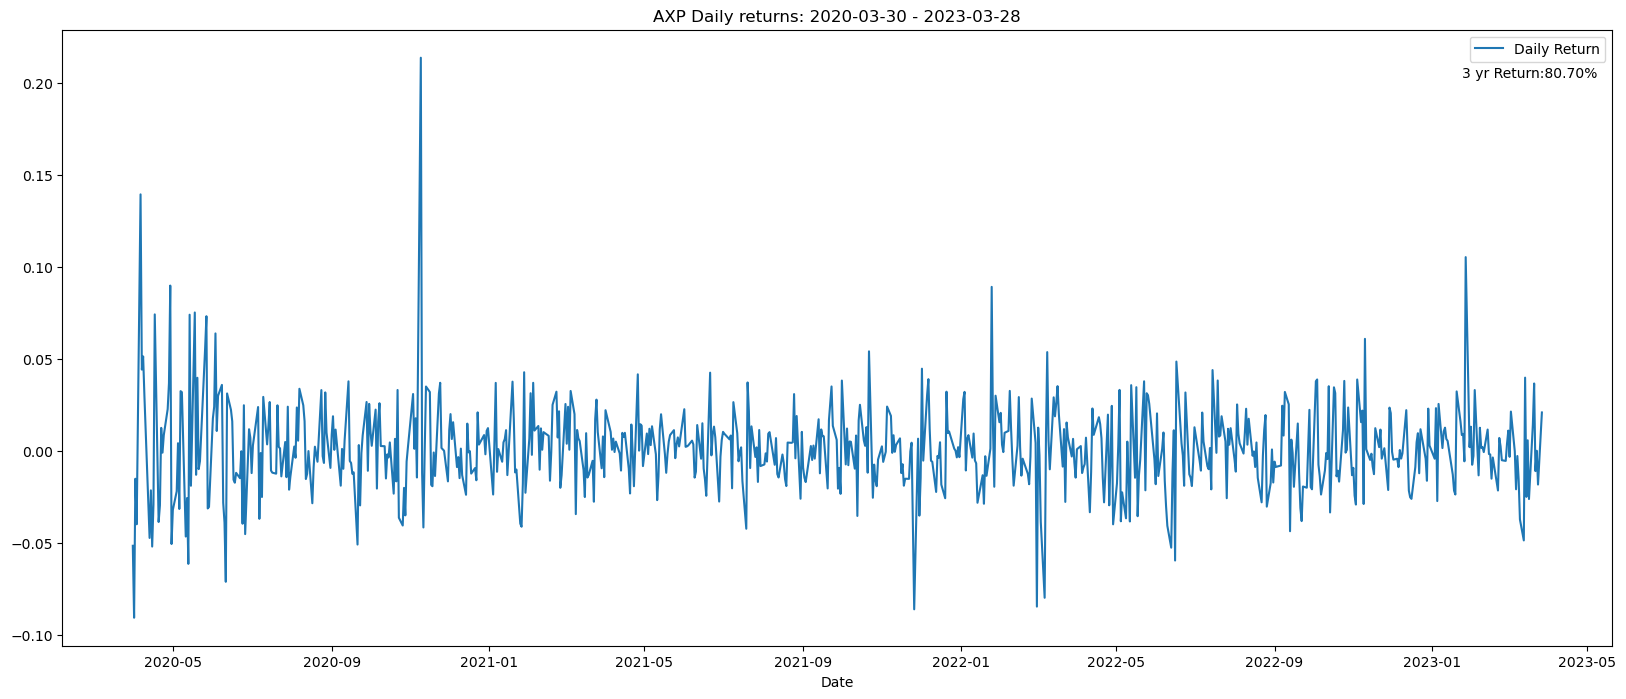

In [7]:
x2.plot(figsize=(20, 8),title=f'{ticker} Daily returns: {START_DATE} - {END_DATE}') #plot title
plt.figtext(.825, .82, f'3 yr Return:{100 * total.iloc[0,0]:.2f}%')
print(f'{total.iloc[0,0]*100:.2f}%')
plt.show()